# Feature Extraction & Modeling

In this notebook, I train and evaluate several  machine learning models to classify vehicle complaints based on TF-IDF vectorized text.

The models I use are:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Random Forest Classifier**

The goal is to establish baseline performance for this text classification task, and later compare these results to a the transformer-based DistilBERT model.


## Feature Extraction & Vectorization

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text

# Mount Drive & load wrangled dataset
from google.colab import drive
drive.mount('/content/drive')

# Load data
df = pd.read_csv('/content/drive/MyDrive/vehicle-complaints-project/complaints_wrangled.csv')
print("Data shape:", df.shape)

# drop nan values that are not already droppedd
df = df.dropna(subset=['cleaned summary'])
df = df.reset_index(drop=True)

# Define target label and feature
X_text = df['cleaned summary']
y = df['components']

# Domain-specific stopwords to remove words like "vehicle", "car"
# During the EDA phase, I discovered frequently-ocurring uninformative words
# like "vehicle", "car", and "driving" in each component class.
# These need to be removed from the vectorization pool for better performance
# and classification
domain_stopwords = ['vehicle', 'car', 'automobile', 'motor', 'drive', 'driving', 'driver', 'vehicles']


Mounted at /content/drive
Data shape: (147422, 17)


In [3]:
# Combine with English stopwords
custom_stopwords = text.ENGLISH_STOP_WORDS.union(domain_stopwords)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords), max_features=10000)

# Fit and transform
X_tfidf = vectorizer.fit_transform(X_text)

print("TF-IDF matrix shape:", X_tfidf.shape)  # (num_samples, num_features)

# Splitting training and test data for modeling
# 80% allocated for training, 20% for testing
# startify=y to ensure equally balanced components across the train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

TF-IDF matrix shape: (147419, 10000)
Train set size: (117935, 10000)
Test set size: (29484, 10000)


##Modeling & Evaluation

### Logistic Regression

Logistic Regression is a simple method to create an effective baseline for text classification comparison.

I train a Logistic Regression model with default hyperparameters and evaluate its performance on the test set.

Classification Report: 
                        precision    recall  f1-score   support

              air bags       0.87      0.85      0.86      1478
     electrical system       0.69      0.75      0.72      6313
                engine       0.72      0.77      0.74      4931
fuel/propulsion system       0.72      0.61      0.66      1089
           power train       0.73      0.73      0.73      5776
        service brakes       0.78      0.80      0.79      2551
              steering       0.90      0.84      0.87      3195
             structure       0.82      0.74      0.78      1673
 vehicle speed control       0.53      0.37      0.43      1083
      visibility/wiper       0.88      0.89      0.88      1395

              accuracy                           0.75     29484
             macro avg       0.76      0.73      0.75     29484
          weighted avg       0.75      0.75      0.75     29484

Confusion Matrix: 
[[1256  111   18   10   15   19   18   11   17    3]
 [  6

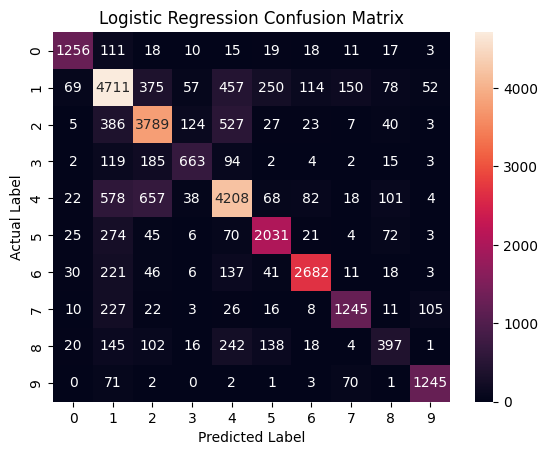

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Training logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
lr_y_pred = lr_model.predict(X_test)

# Classification report
print("Classification Report: ")
print(classification_report(y_test, lr_y_pred))

# Confusion Matrix
print("Confusion Matrix: ")
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

# Confusion Matrix as Heatmap
sns.heatmap(lr_cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Support Vector Machine

Support Vector Machines generally perform highly on high-dimensional sparse data such as TF-IDF representations of text.

Below, I train a linear SVM (LinearSVC) and evaluate its performance accordingly.

Classification Report: 
                        precision    recall  f1-score   support

              air bags       0.85      0.87      0.86      1478
     electrical system       0.70      0.72      0.71      6313
                engine       0.71      0.76      0.74      4931
fuel/propulsion system       0.69      0.63      0.65      1089
           power train       0.74      0.71      0.73      5776
        service brakes       0.76      0.80      0.78      2551
              steering       0.88      0.85      0.86      3195
             structure       0.80      0.75      0.77      1673
 vehicle speed control       0.51      0.36      0.42      1083
      visibility/wiper       0.86      0.90      0.88      1395

              accuracy                           0.75     29484
             macro avg       0.75      0.74      0.74     29484
          weighted avg       0.75      0.75      0.75     29484

Confusion Matrix: 
[[1284   80   29   10   15   17   17    7   17    2]
 [  8

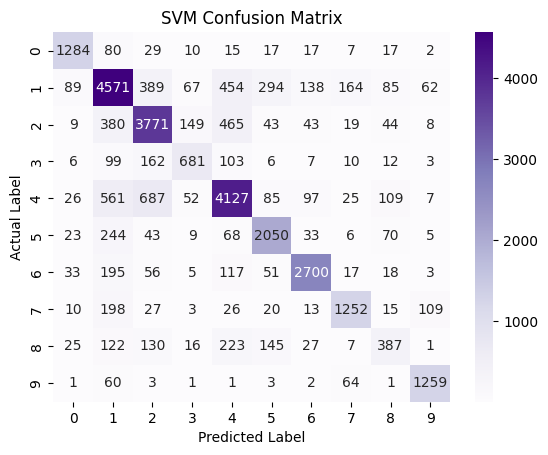

In [14]:
from sklearn.svm import LinearSVC

# Training SVM model
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict
svm_y_pred = svm_model.predict(X_test)

# Classification report
print("Classification Report: ")
print(classification_report(y_test, svm_y_pred))

# Confusion Matrix
print("Confusion Matrix: ")
svm_cm = confusion_matrix(y_test, svm_y_pred)
print(svm_cm)

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('SVM Confusion Matrix')
plt.show()

### Random Forest Classifier

Although Random Forests are not generally great on sparse text features, I included this model for comparison to the other models and underline the perfomance difference between them.


Classification Report: 
                        precision    recall  f1-score   support

              air bags       0.82      0.88      0.85      1478
     electrical system       0.68      0.70      0.69      6313
                engine       0.72      0.77      0.74      4931
fuel/propulsion system       0.73      0.60      0.66      1089
           power train       0.71      0.73      0.72      5776
        service brakes       0.73      0.83      0.78      2551
              steering       0.86      0.85      0.85      3195
             structure       0.83      0.70      0.76      1673
 vehicle speed control       0.64      0.21      0.32      1083
      visibility/wiper       0.86      0.90      0.88      1395

              accuracy                           0.74     29484
             macro avg       0.76      0.72      0.73     29484
          weighted avg       0.74      0.74      0.74     29484

Confusion Matrix: 
[[1304   84   14    3   15   19   19   12    6    2]
 [ 10

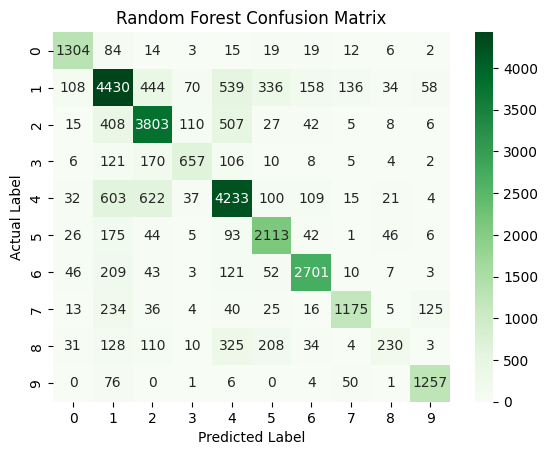

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Training RFC
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train, y_train)

# Predict
rfc_y_pred = rfc_model.predict(X_test)

# Classification Report
print("Classification Report: ")
print(classification_report(y_test, rfc_y_pred))

# Confusion Matrix
print("Confusion Matrix: ")
rfc_cf = confusion_matrix(y_test, rfc_y_pred)
print(rfc_cf)

sns.heatmap(rfc_cf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Summary of Classical Models

All three classical models demonstrate reasonable performance on the vehicle complaints classification task, with Logistic Regression and SVM achieving analogous results (~75% accuracy).

These baselines provide a useful point of comparison for the DistilBERT model explored in the next notebook.